##Задача №63.
1. Изобразите отношение households к population с
помощью точечного графика
2. Визуализировать longitude по отношения к
median_house_value, используя линейный график
3. Представить гистограмму по housing_median_age
4. Изобразить гистограмму по median_house_value с
оттенком housing_median_age

In [ ]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('/content/sample_data/california_housing_train.csv')

In [ ]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


<Axes: xlabel='households', ylabel='population'>

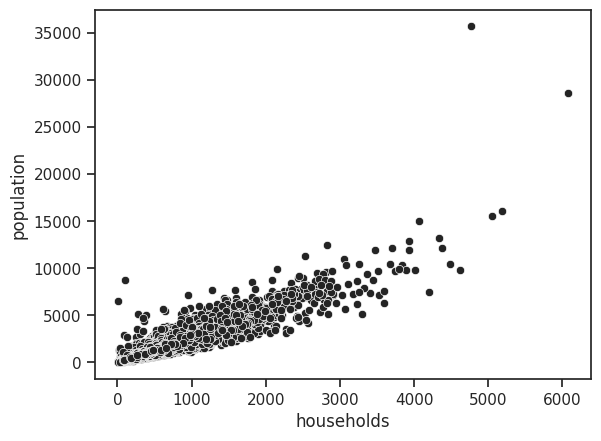

In [ ]:
#sns.set(style='whitegrid')
sns.set(style='ticks', context='notebook', palette='gray')

sns.scatterplot(x="households", y="population", data=df)

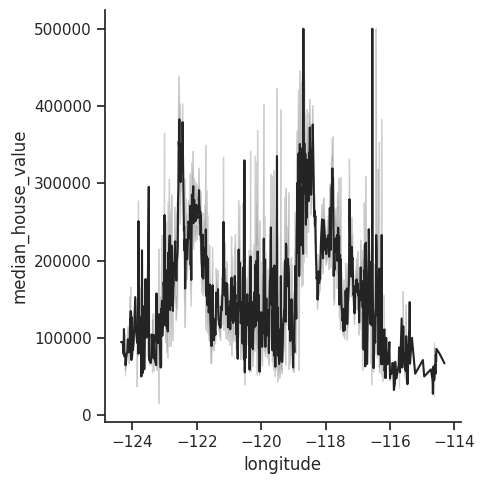

In [ ]:
sns.relplot(x='longitude', y='median_house_value', kind='line', data=df)

<Axes: xlabel='housing_median_age', ylabel='Count'>

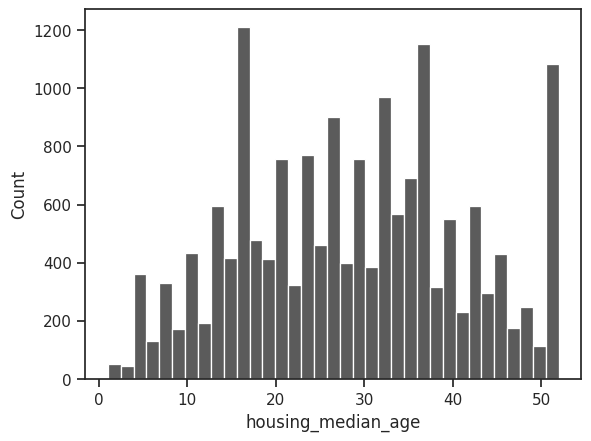

In [ ]:
sns.histplot(data=df,x="housing_median_age")

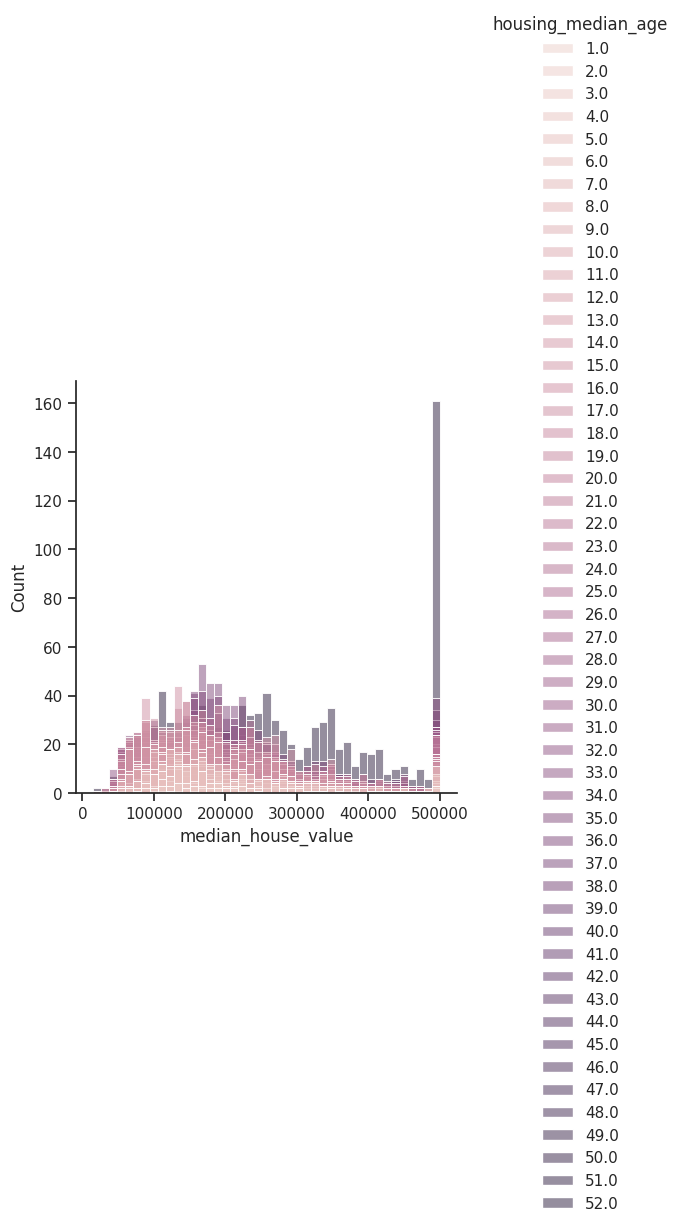

In [ ]:
sns.displot(x='median_house_value', data=df, hue='housing_median_age')

##Задача №65.
Написать EDA для датасета про пингвинов
Необходимо:
####● Использовать 2-3 точечных графика
####● Применить доп измерение в точечных графиках, используя
аргументы hue, size, stile
####● Использовать PairGrid с типом графика на ваш выбор
####● Изобразить Heatmap
####● Использовать 2-3 гистограммы

Чтобы подключить датасет с
пингвинами, воспользуйтесь данным
скриптом:
penguins = sns.load_dataset("penguins")
penguins.head()

In [ ]:
penguins = sns.load_dataset('penguins')
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

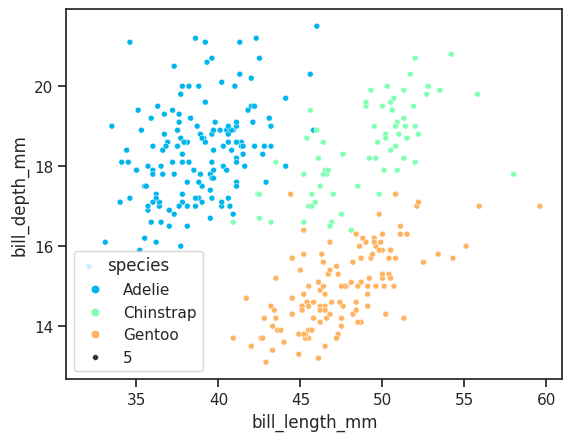

In [ ]:
sns.scatterplot(x="bill_length_mm", y="bill_depth_mm", data=penguins, palette = 'rainbow', hue='species', size = 5)

<Axes: xlabel='flipper_length_mm', ylabel='bill_length_mm'>

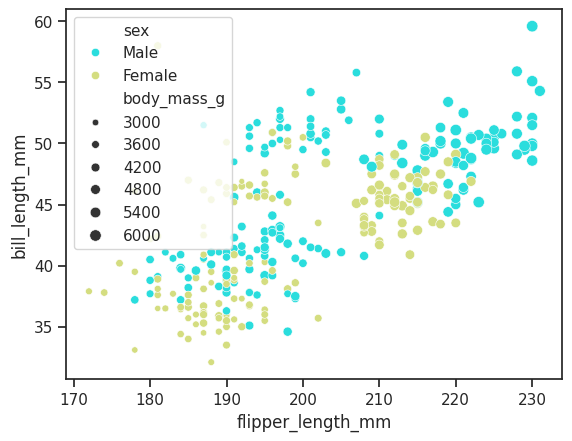

In [ ]:
sns.scatterplot(x="flipper_length_mm", y="bill_length_mm", data=penguins, palette = 'rainbow', hue='sex', size = 'body_mass_g')

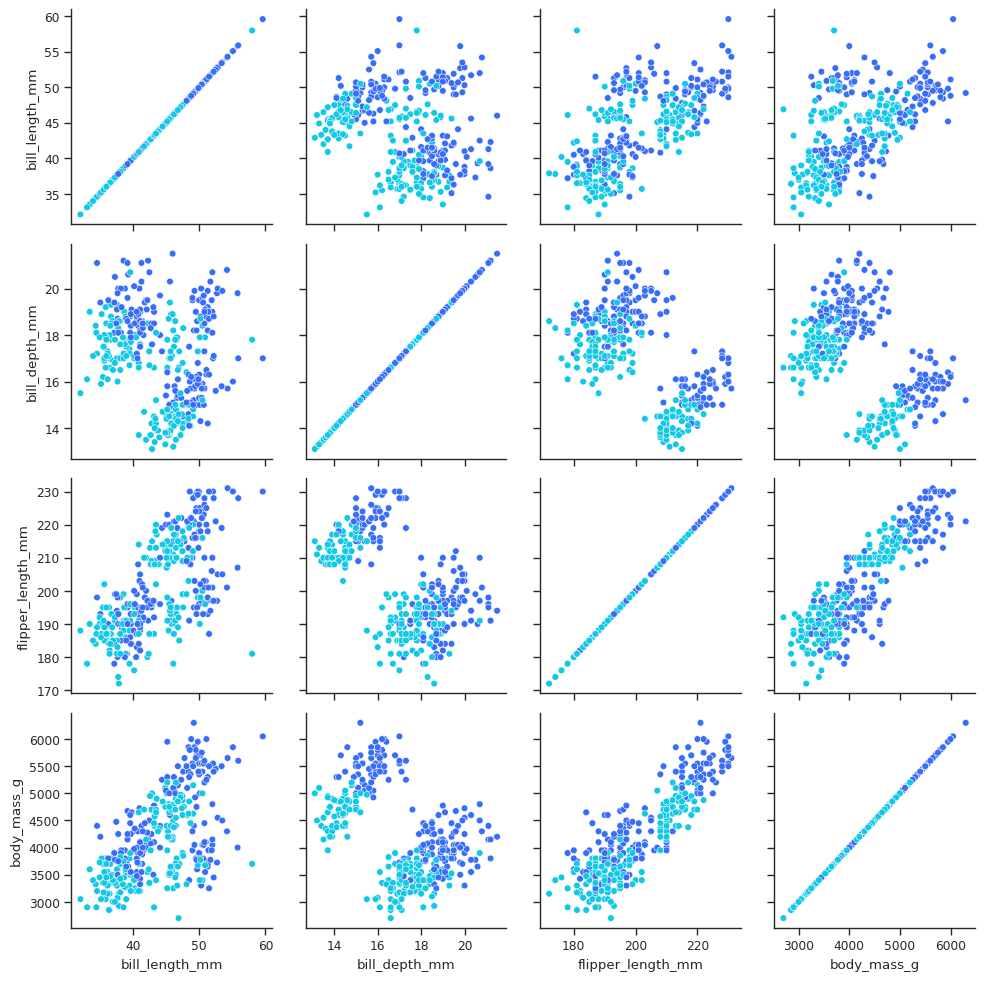

In [ ]:
#sns.scatterplot(x="flipper_length_mm", y="bill_length_mm", data=penguins, palette = 'rainbow', hue='sex', size = 'body_mass_g')
sns.set(style='ticks', context='paper', palette='rainbow')
g = sns.PairGrid(penguins, diag_sharey = False, hue='sex')
g.map(sns.scatterplot)

<Axes: xlabel='island', ylabel='Count'>

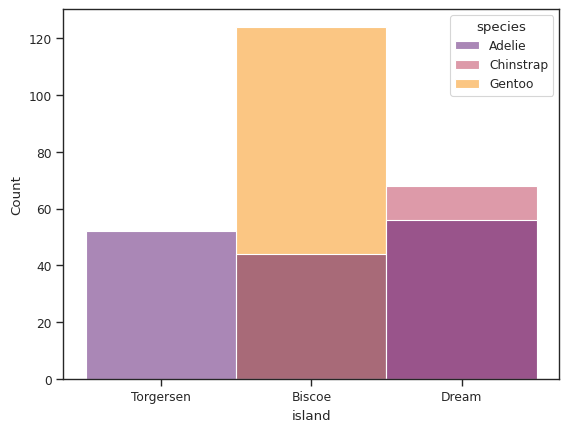

In [ ]:
sns.histplot(data=penguins,x="island", hue = 'species', palette = 'inferno')

<Axes: xlabel='island', ylabel='Count'>

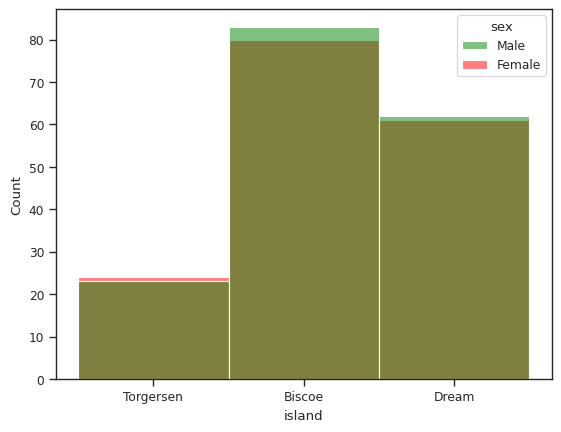

In [ ]:
color = ["green", "Red"]
sns.set_palette(color)

sns.histplot(data=penguins,x="island", hue = 'sex', palette = sns.color_palette())

<Axes: >

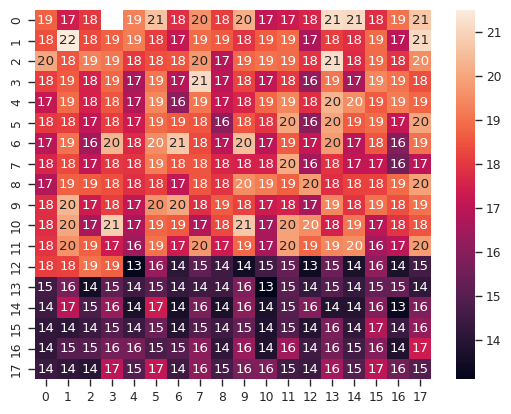

In [ ]:
import numpy as np

lst1 = list(penguins['bill_depth_mm'])[:324]
lst1 = np.array(lst1).reshape((18,18))
sns.heatmap(data = lst1, annot = True)

##Задача №67.
1. Создать новый столбец в таблице с
пингвинами, который будет отвечать за
показатель длины клюва пингвина.

high - длинный(от 42)

middle - средний(от 35 до 42)

low - маленький(до 35)


<Axes: xlabel='heigh_group', ylabel='Count'>

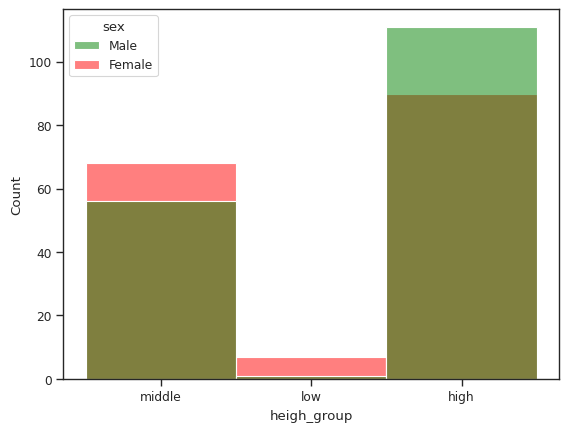

In [ ]:
penguins.loc[penguins['bill_length_mm'] >= 42, 'heigh_group'] = 'high'
penguins.loc[(penguins['bill_length_mm'] < 42) & (penguins['bill_length_mm'] >= 35), 'heigh_group'] = 'middle'
penguins.loc[penguins['bill_length_mm'] < 35, 'heigh_group'] = 'low'
sns.histplot(data=penguins,x="heigh_group", hue = 'sex')

<Axes: xlabel='species', ylabel='heigh_group'>

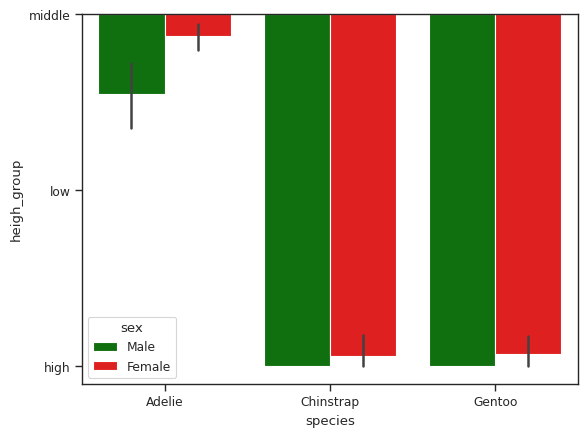

In [ ]:
sns.barplot(data=penguins, x = 'species', y="heigh_group", hue = 'sex')

<Axes: xlabel='heigh_group', ylabel='Count'>

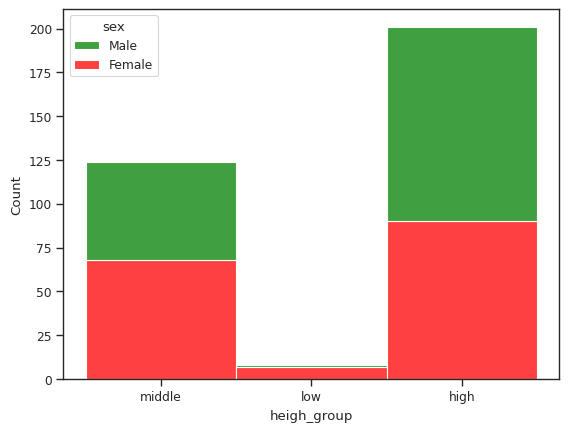

In [ ]:
sns.histplot(data=penguins, x = "heigh_group", hue = 'sex', multiple="stack")

##Задача №69. Решение в группах
1. Изобразить гистограмму по flipper_length_mm
с оттенком height_group. Сделать анализ


<Axes: xlabel='bill_length_mm', ylabel='Count'>

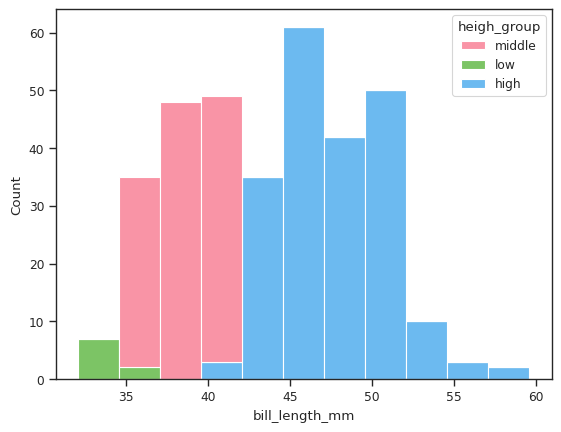

In [ ]:
sns.histplot(data=penguins, x = "bill_length_mm", hue = 'heigh_group', multiple="stack")